In [2]:
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

In [11]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
#nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fryde\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
add = "ruddit_with_text.csv"

raw = pd.read_csv(add)

In [4]:
raw.columns

Index(['Unnamed: 0', 'comment_id', 'post_id', 'offensiveness_score',
       'post_title', 'comment_body'],
      dtype='object')

In [5]:
raw.head(10)

,Unnamed: 0,comment_id,post_id,offensiveness_score,post_title,comment_body
0,0,cza1q49,42g75o,-0.083,"CMV: The so called ""Wage Gap"" is a myth.",> The difference in average earnings between m...
1,1,cza1wdh,42g75o,-0.022,"CMV: The so called ""Wage Gap"" is a myth.","The myth is that the ""gap"" is entirely based o..."
2,2,cza23qx,42g75o,0.167,"CMV: The so called ""Wage Gap"" is a myth.",[deleted]
3,3,cza2bw8,42g75o,-0.146,"CMV: The so called ""Wage Gap"" is a myth.",The assertion is that women get paid less for ...
4,4,cza2iji,42g75o,-0.083,"CMV: The so called ""Wage Gap"" is a myth.",You said in the OP that's not what they're mea...
5,5,cza2jj3,42g75o,-0.042,"CMV: The so called ""Wage Gap"" is a myth.",>Men and women are not payed less for the same...
6,6,cza31e2,42g75o,-0.021,"CMV: The so called ""Wage Gap"" is a myth.","> All the wage gap is, is an average of total ..."
7,7,cza321d,42g75o,-0.021,"CMV: The so called ""Wage Gap"" is a myth.",[deleted]
8,8,cza336e,42g75o,0.208,"CMV: The so called ""Wage Gap"" is a myth.",[deleted]
9,9,cza34dq,42g75o,-0.191,"CMV: The so called ""Wage Gap"" is a myth.",[deleted]


In [6]:
sliced = raw[raw['comment_body'] != '[deleted]']

In [7]:
sliced['offensiveness_score'].value_counts()

offensiveness_score
-0.021    155
 0.000    151
-0.167    135
-0.125    128
-0.208    121
         ... 
-0.787      1
 0.696      1
-0.696      1
 0.644      1
 0.578      1
Name: count, Length: 288, dtype: int64

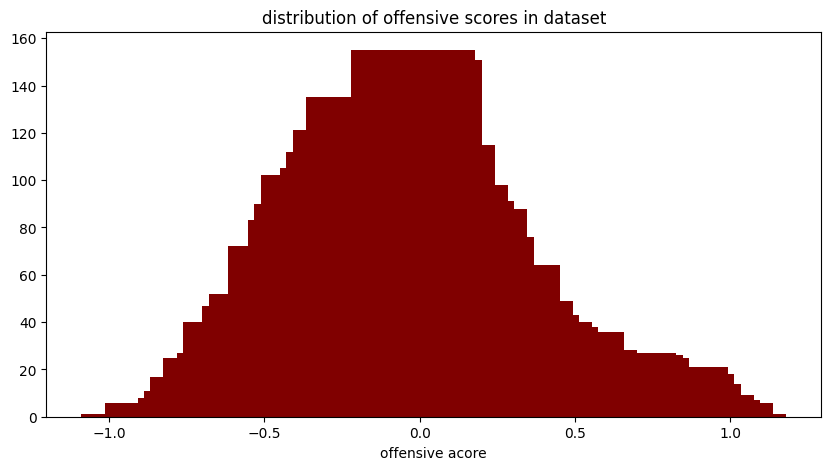

In [17]:

fig = plt.figure(figsize = (10, 5))
plt.bar(sliced['offensiveness_score'].value_counts().index, sliced['offensiveness_score'].value_counts().tolist(), color ='maroon',
        width = 0.4)
 
plt.xlabel("offensive acore")
plt.title("distribution of offensive scores in dataset")
plt.show()


In [18]:
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


In [19]:
sliced['clean_text'] = sliced['comment_body'].apply(lambda x: finalpreprocess(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\fryde/nltk_data'
    - 'c:\\Users\\fryde\\miniconda3\\envs\\muzg\\nltk_data'
    - 'c:\\Users\\fryde\\miniconda3\\envs\\muzg\\share\\nltk_data'
    - 'c:\\Users\\fryde\\miniconda3\\envs\\muzg\\lib\\nltk_data'
    - 'C:\\Users\\fryde\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(sliced["clean_text"], sliced['offensiveness_score'],test_size=0.2,shuffle=True)


In [1]:
y_train.iloc[2]
print(X_train[2])

NameError: name 'y_train' is not defined